# Introduction

The IMDb Top 250 list represents a curated selection of highly acclaimed films that have garnered worldwide recognition. This solo project undertakes an exploratory data analysis (EDA) of the IMDb Top 250 movies from 1996 to 2021. The objective is to uncover patterns and insights that contribute to the enduring brilliance of these cinematic masterpieces.

Using statistical techniques, data visualization, and thorough data exploration, this analysis aims to address key inquiries related to genre dominance, rating trends, director influence, correlations between release years and rankings, as well as the presence of outliers. By doing so, it seeks to enhance our understanding of the art of filmmaking and provide valuable insights into the evolving preferences of audiences over time.


Here are few questions that will be answered throughout the project:

- What is the distribution of movie genres in the IMDb Top 250 dataset? How has it changed throughout the years? 
- How does Runtime distribution look like? 
- Is there a relationship between the runtime of a movie and its IMDb rating? Which relationships arise in general and how strong are they? 
- Who are the most frequently appearing actors or directors in the IMDb Top 250 movies?

**Data Sources**

`imdbTop250.csv` was provided via Kaggle (https://www.kaggle.com/datasets/mustafacicek/imdb-top-250-lists-1996-2020/code)

## Importing modules

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, animation
from sklearn.impute import SimpleImputer
import seaborn as sns
%matplotlib inline

## Load the data

#### imdbTop250

`imdbTop250.csv` contains information on the different movies which were listed on TOP-250 IMDB rankings from 1996 to 2020

In [29]:
movies = pd.read_csv('imdbTop250.csv')
movies.head(5)

,Ranking,IMDByear,IMDBlink,Title,Date,RunTime,Genre,Rating,Score,Votes,Gross,Director,Cast1,Cast2,Cast3,Cast4
0,1,1996,/title/tt0076759/,Star Wars: Episode IV - A New Hope,1977,121,"Action, Adventure, Fantasy",8.6,90.0,1299781,322.74,George Lucas,Mark Hamill,Harrison Ford,Carrie Fisher,Alec Guinness
1,2,1996,/title/tt0111161/,The Shawshank Redemption,1994,142,Drama,9.3,80.0,2529673,28.34,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler
2,3,1996,/title/tt0117951/,Trainspotting,1996,93,Drama,8.1,83.0,665213,16.50,Danny Boyle,Ewan McGregor,Ewen Bremner,Jonny Lee Miller,Kevin McKidd
3,4,1996,/title/tt0114814/,The Usual Suspects,1995,106,"Crime, Drama, Mystery",8.5,77.0,1045626,23.34,Bryan Singer,Kevin Spacey,Gabriel Byrne,Chazz Palminteri,Stephen Baldwin
4,5,1996,/title/tt0108598/,The Wrong Trousers,1993,30,"Animation, Short, Comedy",8.3,NaN,53316,NaN,Nick Park,Peter Sallis,Peter Hawkins,NaN,NaN


## Checking for missing data and cleaning

In [30]:
null_counts = movies.isnull().sum()
print(null_counts)

Ranking       0
IMDByear      0
IMDBlink      0
Title         0
Date          0
RunTime       0
Genre         0
Rating        0
Score       826
Votes         0
Gross       809
Director      0
Cast1         0
Cast2         0
Cast3         8
Cast4         8
dtype: int64


In the dataset, it is observed that there are quite a lot of missing values in the "Score" and "Gross" columns. These missing values could potentially impact the analysis results. Therefore, it is better to perform imputation to fill in the missing values in these columns. By imputing the missing values, we can ensure a more comprehensive and accurate analysis of the dataset.

In [31]:
imputer = SimpleImputer(strategy='median')
#movies[['Gross', 'Score']] = imputer.fit_transform(movies[['Gross', 'Score']]) - variation with excessive copying
columns_to_impute = ['Gross', 'Score']
movies.loc[:, columns_to_impute] = imputer.fit_transform(movies[columns_to_impute])
print(movies.isnull().sum())

Ranking     0
IMDByear    0
IMDBlink    0
Title       0
Date        0
RunTime     0
Genre       0
Rating      0
Score       0
Votes       0
Gross       0
Director    0
Cast1       0
Cast2       0
Cast3       8
Cast4       8
dtype: int64


There are some columns where Cast3 and Cast4 info is missing. However, the amount of those is not significant compared to size of dataset, so we can just omit the rows where data is missing

In [32]:
#columns_to_drop = ['Cast3', 'Cast4']
#movies = movies.dropna(subset=columns_to_drop)
#print(movies.isnull().sum())

Actually that approach doesn't work properly there because we can miss important data about e.g directors, ranking, votes etc... So it would be more appropriate to substitute null values in these columns for None

In [33]:
movies = movies.fillna(value='None')
# print(movies.isnull().sum())

## Explore the data

#### Number of distinct movies in rating 

In [34]:
movies.IMDBlink.nunique()

744

In [35]:
unique_movies = movies.drop_duplicates(subset=['IMDBlink'])

Obviously, there are movies which are included in the list throughout the years.
#### Let's see which movies were included in the top *every* year from 1996 to 2021

In [36]:
table = movies['Title'].value_counts()
print(f'amount of all time favorite movies: {len(table[table==26])}\n')
for i in range(len(table[table==26])):
    print(table.index[i])

amount of all time favorite movies: 78

Star Wars: Episode IV - A New Hope
Indiana Jones and the Last Crusade
On the Waterfront
Singin' in the Rain
Gone with the Wind
Once Upon a Time in America
Terminator 2: Judgment Day
Ran
Full Metal Jacket
Psycho
The Godfather: Part II
The Third Man
Alien
Vertigo
Some Like It Hot
Taxi Driver
Cinema Paradiso
Once Upon a Time in the West
Star Wars: Episode VI - Return of the Jedi
Goodfellas
Apocalypse Now
North by Northwest
Lawrence of Arabia
Amadeus
Die Hard
To Kill a Mockingbird
Raging Bull
Life of Brian
The Sting
The Deer Hunter
Chinatown
The Bridge on the River Kwai
Stand by Me
The Seventh Seal
The Treasure of the Sierra Madre
Metropolis
Modern Times
The Shining
Rashomon
The Gold Rush
The Great Escape
Forrest Gump
Cool Hand Luke
Das Boot
Back to the Future
Unforgiven
Ben-Hur
The Great Dictator
12 Angry Men
The Silence of the Lambs
2001: A Space Odyssey
Se7en
Léon: The Professional
The Princess Bride
Seven Samurai
Reservoir Dogs
Fargo
The Shawshan

#### It would be interesting to see whether there's a relationship between movie being all time favorite and its IMDb ranking

<AxesSubplot:xlabel='all26', ylabel='Ranking'>

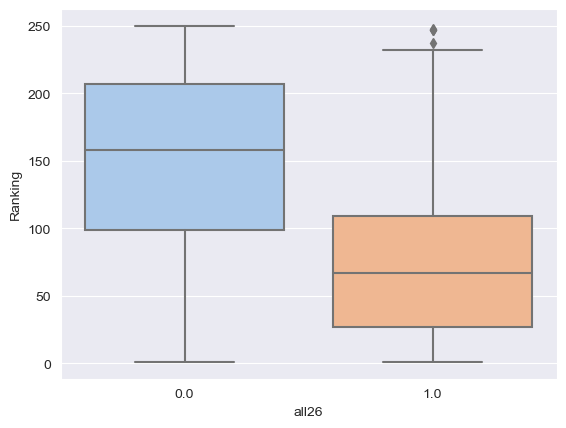

In [37]:
movies.loc[movies['Title'].isin(table[table == 26].index), 'all26'] = 1
movies.loc[~movies['Title'].isin(table[table == 26].index), 'all26'] = 0
sns.boxplot(x='all26', y='Ranking', data=movies, palette='pastel')

Indeed, there is a clear association between these two values. Movies that have consistently ranked in the top 250 across all years tend to have a lower median ranking, around 75. On the other hand, movies that did not make it to the top 250 have a higher median ranking, around 160. This suggests that being an all-time favorite among IMDb users is closely related to achieving a higher ranking in the IMDb Top 250 list.

#### Defining which movies were top-10 every year and search for some tendency

In [38]:
top10 = lambda year: movies[movies['IMDByear'] == year].sort_values(by='Ranking', ascending=True).head(10)
#for each movie who was in top 10 in any year assign a random color
colors = {title: np.random.rand(3,) for title in movies['Title'].unique()}
def update(year):
    data = top10(year)
    ax.clear()
    ax.barh(data['Title'], data['Rating'], color=[colors[title] for title in data['Title']])
    ax.bar_label(ax.containers[0], fmt='%.1f')
    #inversing the y-axis to put movies with higher ranking above ones without
    ax.invert_yaxis()
    plt.title(f'Top 10 movies of {year} and their rating')
    plt.xlabel('Title')
    plt.ylabel('Ranking')

In [39]:
%matplotlib notebook
fig, ax = plt.subplots()
animator = animation.FuncAnimation(fig, update, frames=range(1996, 2022), interval=500)
fig.subplots_adjust(left=0.4)
plt.show(animator)

<IPython.core.display.Javascript object>

There is a strong prevalence of certain films like "The Shawshank Redemption" and "The Godfather" in the top of IMDb250 list. These movies consistently maintain high rankings across multiple years, indicating their enduring popularity and recognition among IMDb users. Their consistent presence in the top rankings suggests that they are widely regarded as exceptional films with enduring appeal.

#### Genres distribution across the years

In [40]:
genre_set = set()
for genre in unique_movies['Genre'].str.split(', '):
    genre_set |= set(genre)

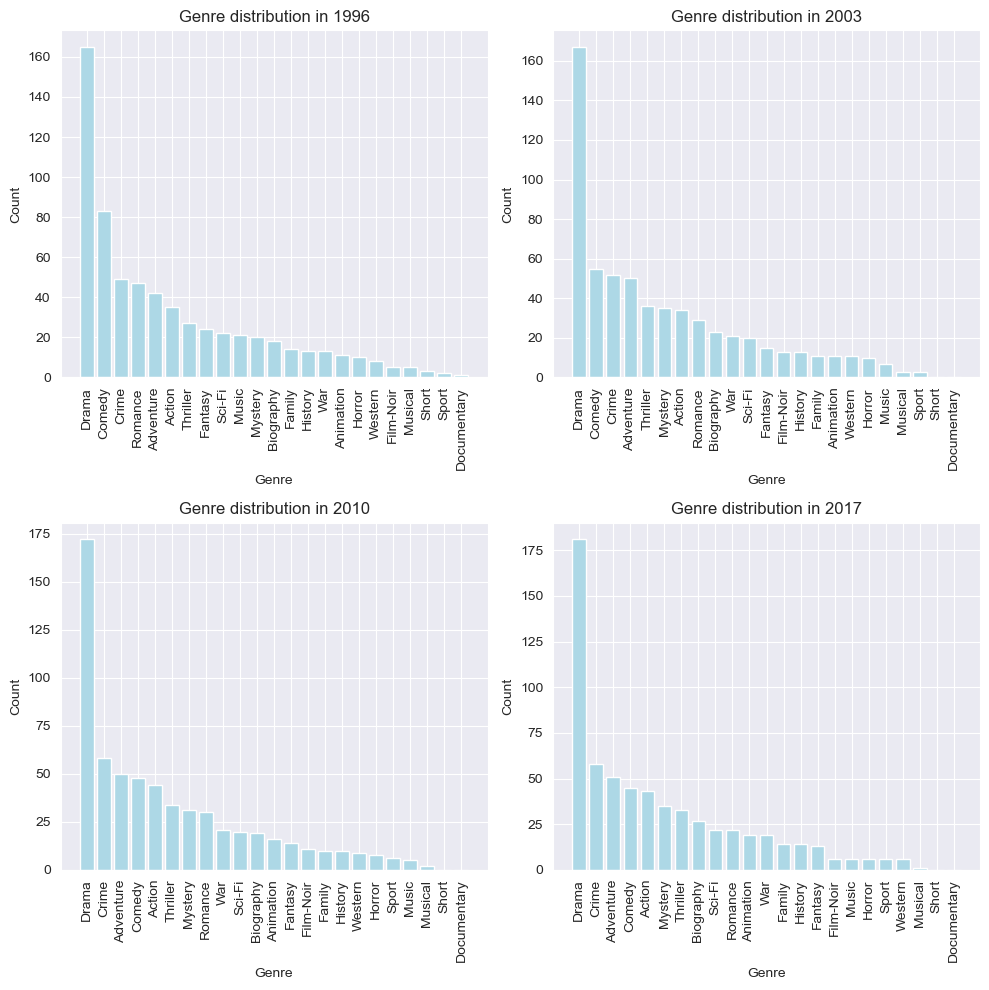

In [41]:
%matplotlib inline
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
s = lambda data, value: data.str.contains(value).sum()
for year in range(1996, 2022, 7):
    data = movies[movies['IMDByear'] == year]
    genre_dict = {genre: s(data['Genre'], genre) for genre in genre_set}
    genre_dict = dict(sorted(genre_dict.items(), key=lambda item: item[1], reverse=True))
    row = ((year - 1996) // 7) // 2
    col = ((year - 1996) // 7) % 2
    axs[row, col].bar(genre_dict.keys(), genre_dict.values(), color='lightblue')
    axs[row, col].set_title(f'Genre distribution in {year}')
    axs[row, col].set_xlabel('Genre')
    axs[row, col].set_ylabel('Count')
    axs[row, col].tick_params(axis='x', rotation=90)
plt.tight_layout()

From the provided bar charts, it is evident that the drama has consistently been the most prevalent genre in the IMDb Top 250 list, appearing in around 170 out of 250 movies. Comedy held the second spot in popularity until the mid-2000s when it was replaced by crime as the second most popular genre. On the other hand, the least popular genres among the top movies were documentary, musicals, short movies, and  movies about sport." These genres had relatively fewer representations in the IMDb Top 250 list.

#### Deriving insights from duration info

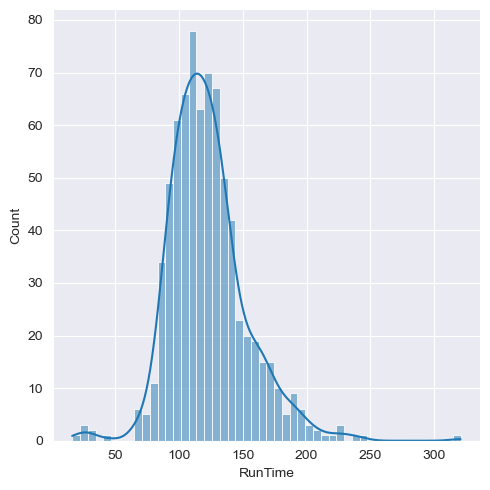

In [42]:
sns.displot(unique_movies['RunTime'], bins=50, kde=True)

In [43]:
print(unique_movies['RunTime'].describe())

count    744.000000
mean     122.416667
std       30.402788
min       16.000000
25%      102.000000
50%      119.000000
75%      136.250000
max      321.000000
Name: RunTime, dtype: float64


The analysis of the runtime data reveals that it may follow an approximately normal distribution, however data is a little bit scewed. We can perform hyphotesis test on the sample of movies durations.

In [44]:
sample = unique_movies['RunTime']
from scipy.stats import kstest, normaltest
stat1, p1 = kstest(sample, 'norm', args=(sample.mean(),sample.std()))
stat2, p2 = normaltest(sample)
def perform_test(p):
    if p > 0.05:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')
        
perform_test(p1)
perform_test(p2)

Sample does not look Gaussian (reject H0)
Sample does not look Gaussian (reject H0)


Despite the visual appearance of the plot resembling a bell curve, there is evidence suggesting that the sample is not truly normally distributed. This conclusion is based on the results of statistical tests, which indicate that the observed data deviates significantly from a normal distribution. 

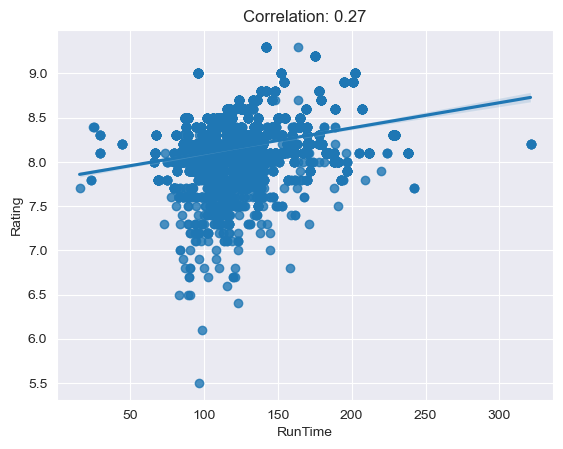

In [45]:
plt.figure()
sns.regplot(x='RunTime', y='Rating', data=movies, scatter=True).\
set_title(f'Correlation: {movies["RunTime"].corr(movies["Rating"]):.2f}')
plt.show()

Upon examining the relationship between rating and runtime, it appears that there is a relatively weak correlation between the two variables. This suggests that the relationship between rating and runtime may not be strong enough to draw any definite conclusions.

#### The most popular directors and actors according to IMDb Top 250

In [46]:
director_set = set(unique_movies['Director'])
    
director_dict = {director: s(unique_movies['Director'],director) for director in director_set}
director_dict = dict(sorted(director_dict.items(), key=lambda item: item[1], reverse=True))

top_10_directors = dict(list(director_dict.items())[:10])

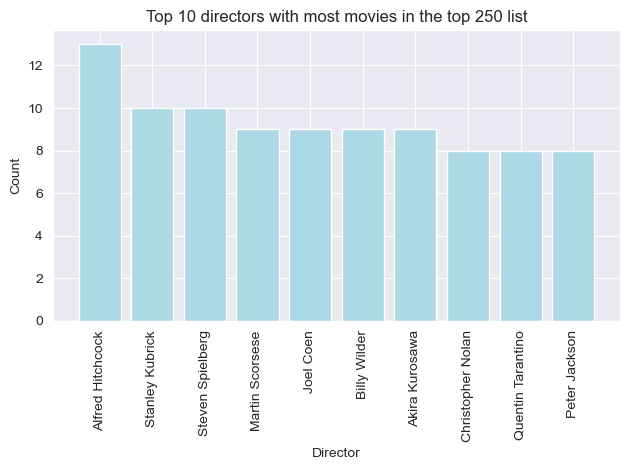

In [47]:
fig, ax2 = plt.subplots()
ax2.bar(top_10_directors.keys(), top_10_directors.values(), color='lightblue')
plt.xticks(rotation=90)
ax2.set_title('Top 10 directors with most movies in the top 250 list')
ax2.set_xlabel('Director')
ax2.set_ylabel('Count')
plt.tight_layout()

According to the analysis conducted on the IMDb top 250 list, Alfred Hitchcock emerges as the most popular director with a remarkable presence of 13 movies that have attained a spot in the top rankings at least once. Interestingly, the second place is shared between Stanley Kubrick and Steven Spielberg, showcasing their significant impact on the film industry. This observation underscores the enduring appeal and recognition of their respective works, solidifying their positions as influential figures in the world of cinema.

In [48]:
cast1 = unique_movies['Cast1']
cast2 = unique_movies['Cast2']
cast3 = unique_movies['Cast3']
cast4 = unique_movies['Cast4']

actor_set = set()

for actor in cast1:
    actor_set.add(actor)
for actor in cast2:
    actor_set.add(actor)
for actor in cast3:
    actor_set.add(actor)
for actor in cast4:
    actor_set.add(actor)

actor_set -= {'None'}

actors_list = list(actor_set)
actors_dict = {actor: s(cast1,actor) + s(cast2,actor) + s(cast3,actor) + s(cast4,actor) for actor in actors_list}
actors_dict = dict(sorted(actors_dict.items(), key=lambda item: item[1], reverse=True))

top_10_actors = dict(list(actors_dict.items())[:10])

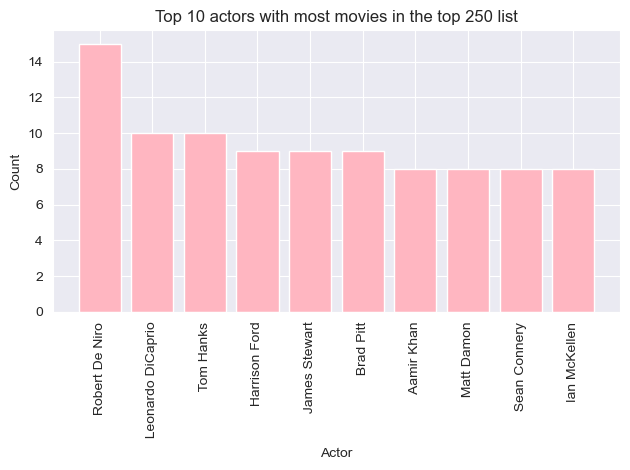

In [49]:
fig, ax3 = plt.subplots()
ax3.bar(top_10_actors.keys(), top_10_actors.values(), color='lightpink')
plt.xticks(rotation=90)
ax3.set_title('Top 10 actors with most movies in the top 250 list')
ax3.set_xlabel('Actor')
ax3.set_ylabel('Count')
plt.tight_layout()
plt.show()

#### Relationships between numerical variables in dataset

Text(0.5, 1.0, 'Correlation matrix between numerical values of the dataset')

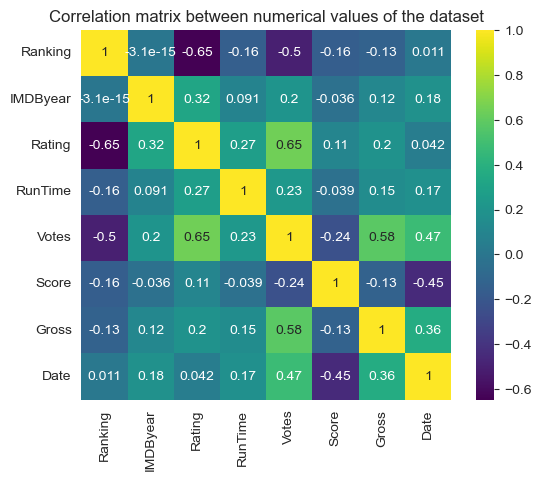

In [51]:
movies_corr = movies[['Ranking','IMDByear','Rating','RunTime','Votes', 'Score', 'Gross', 'Date']].corr()
plt.figure()
sns.heatmap(movies_corr, annot=True, cmap='viridis', square=True).set_title('Correlation matrix between numerical values of the dataset')

The correlation matrix reveals that the variables with the strongest relationships are ranking and rating, as well as votes and rating. These correlations indicate a significant association between popularity of the movie and its overall rating.

## Conclusions

The project was able to successfully generate multiple data visualizations and derived meaningful insights regarding the trends observed in the IMDb Top 250 list over the years and decades using EDA techniques such as descriptive statistics and hyphotesis testing. 

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of movie genres in the IMDb Top 250 dataset? How has it changed throughout the years? 
    - The analysis revealed a diverse distribution of movie genres. Drama emerged as the most dominant genre, consistently maintaining a strong presence throughout the years. However, there were notable fluctuations in genre dominance over time. For example, comedy was supplanted by crime after mid 2000s - however, both genres are still in top 3. 
    
- How does Runtime distribution look like? 
    - The runtime distribution in the IMDb Top 250 movies has a mean of 122 minutes and a standard deviation of 30 minutes. While visually resembling a normal distribution, hypothesis tests indicate that the distribution is likely non-normal. Possible factors contributing to this deviation include genre-specific runtime patterns, artistic choices, and cultural contexts. Further investigation is needed to understand the underlying dynamics.
    
- Is there a relationship between the runtime of a movie and its IMDb rating? Which relationships arise in general and how strong are they? 
    - The relationship between movie runtime and IMDb rating is weak, with a correlation coefficient of 0.27. In contrast, the correlation matrix revealed stronger associations between ranking-rating (-0.65) and votes-rating (0.65), indicating that movie ranking and the number of votes have more significant relationships with IMDb ratings.
    
- Who are the most frequently appearing actors or directors in the IMDb Top 250 movies?
    - The most frequently appearing directors in the IMDb Top 250 movies are Alfred Hitchcock, Stanley Kubrick, and Steven Spielberg, each having 13, 10, and 10 movies respectively in the list. Other notable directors with significant presence include Billy Wilder, Joel Coen, Akira Kurosawa, Martin Scorsese, Quentin Tarantino, Christopher Nolan, and Peter Jackson.
    - In terms of actors, Robert De Niro holds the top spot with 15 appearances in the IMDb Top 250 movies. Next in the rating are Tom Hanks and Leonardo DiCaprio (10 appearances each), Brad Pitt, Harrison Ford and James Stewart (9 appearances each), and Al Pacino, Sean Connery, Aamir Khan and Matt Damon having 8 appearances each. These actors have made significant contributions to the films on the list, showcasing their talent and leaving a lasting impact on audiences.
    
    These directors and actors have made significant contributions to the IMDb Top 250 movies, showcasing their talent, versatility, and lasting impact on the film industry.
